#### Case Study: P-Value Significance in Banking Fraud Detection
##### **Step 1: Business Context & Data Setup**

In the Canadian banking sector, we use **A/B Testing** to validate risk policies. This prevents us from rolling out "improvements" that are actually just statistical noise.

**The Scenario:**
* **Group A (Control):** Customers remaining under the **Legacy Fraud Rule**.
* **Group B (Test):** Customers transitioned to the **New Fraud Rule**.

**Objective:** Determine if the **Average Fraud Loss per Transaction** decreased significantly under the New Rule.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Seed for reproducibility (crucial for banking audits)
np.random.seed(42)

# Generate synthetic transaction data for 10,000 customers
# Group A: Mean loss $50, Std Dev $15
group_a = np.random.normal(loc=50, scale=15, size=5000)

# Group B: Mean loss $48, Std Dev $15 (The new rule seems to save $2)
group_b = np.random.normal(loc=48, scale=15, size=5000)

print(f"Group A Mean Loss: ${group_a.mean():.2f}")
print(f"Group B Mean Loss: ${group_b.mean():.2f}")

Group A Mean Loss: $50.08
Group B Mean Loss: $47.85


#### **Step 2: Statistical Significance Testing**

To prove this saving isn't a fluke, we calculate the **P-Value** using a **Two-Sample T-Test**.

* **Null Hypothesis ($H_0$):** The new rule has no effect; any difference is random chance.
* **Alternative Hypothesis ($H_1$):** The new rule significantly reduces fraud losses.
* **Alpha ($\alpha$):** 0.05 (The 5% significance threshold common in financial risk).

In [2]:
# Perform the T-test
t_stat, p_value = stats.ttest_ind(group_a, group_b)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Decision Logic
alpha = 0.05
if p_value < alpha:
    print("Conclusion: Reject H0. The improvement is STATISTICALLY SIGNIFICANT.")
else:
    print("Conclusion: Fail to reject H0. The difference is NOT SIGNIFICANT (likely noise).")

T-statistic: 7.4146
P-value: 0.0000
Conclusion: Reject H0. The improvement is STATISTICALLY SIGNIFICANT.


#### **Step 3: Visualizing the Shift**
We use a Density Plot (KDE) to see how much the fraud profiles overlap. A clear shift to the left for the Blue curve (New Rule) represents successful risk mitigation.

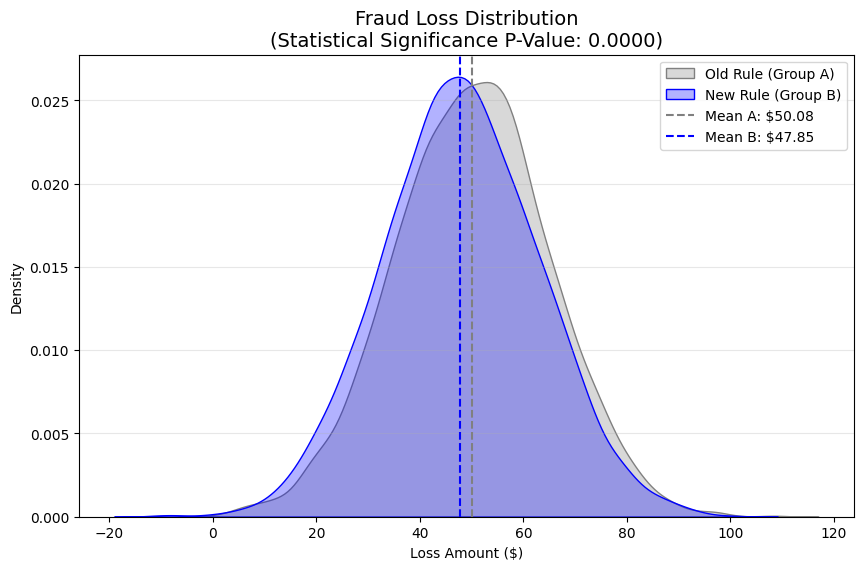

In [4]:
plt.figure(figsize=(10, 6))

# Use fill=True and alpha for transparency instead of shadow
sns.kdeplot(group_a, color="gray", label="Old Rule (Group A)", fill=True, alpha=0.3)
sns.kdeplot(group_b, color="blue", label="New Rule (Group B)", fill=True, alpha=0.3)

# Add vertical lines for the means to show the shift
plt.axvline(group_a.mean(), color='gray', linestyle='--', label=f'Mean A: ${group_a.mean():.2f}')
plt.axvline(group_b.mean(), color='blue', linestyle='--', label=f'Mean B: ${group_b.mean():.2f}')

# Styling the plot
plt.title(f"Fraud Loss Distribution\n(Statistical Significance P-Value: {p_value:.4f})", fontsize=14)
plt.xlabel("Loss Amount ($)")
plt.ylabel("Density")
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.show()

#### **Step 4: Interpretation for Stakeholders**

A "Significant" p-value ($p < 0.05$) is only half the story. As a banking analyst, we must check **Practical Significance**:

1.  **Statistical Significance:** *"Is the result real?"* * **Result:** Yes ($p = {p_value:.4f}$), the drop in fraud is not due to chance.
2.  **Practical Significance:** *"Is it worth the cost?"*

> **The Banking Reality Check:** > If saving $2.00 per user costs $3.00 in manual review time (due to false positives triggered by a stricter rule), the rule is a **bad business move** despite the "significant" p-value. 



**Decision Criteria:**
* **P < 0.05 AND ROI > 0:** Approved for production.
* **P < 0.05 AND ROI < 0:** Rule rejected; too expensive to maintain.
* **P > 0.05:** Rule rejected; results unreliable.